In [1]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config.plotting import save_figure
from spectrum_fit_electrons import SynchrotronSpectrumFit
from config.settings import MCMC_ELECTRONS_SYNCH_ONLY

In [2]:
nsteps = 2000
nwalkers = 64

data = pickle.load(open(os.path.join(MCMC_ELECTRONS_SYNCH_ONLY, f"electrons_{nsteps}n_{nwalkers}w.pck"), "rb"))

flat_samples, synch = data[0], data[1]

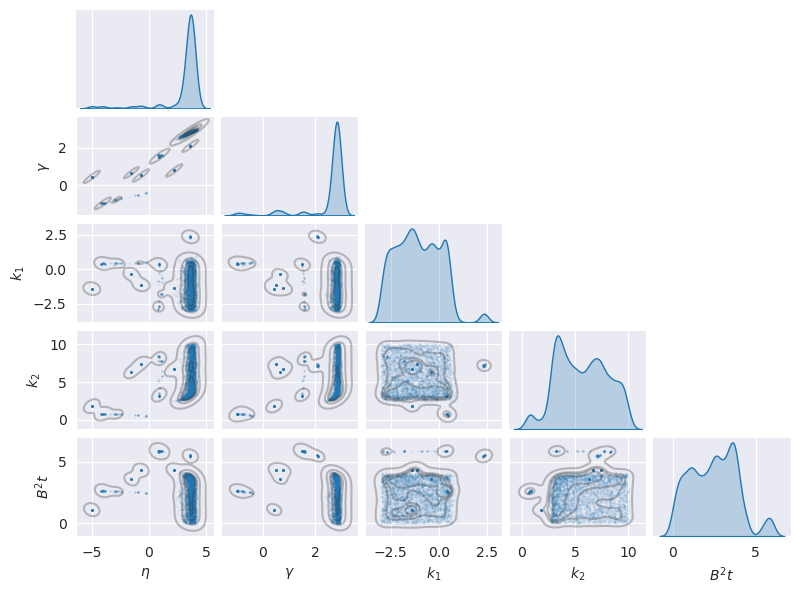

In [3]:
columns = [r"$\eta$", r"$\gamma$", r"$k_1$", r"$k_2$", r"$B^2t$"]
fs = pd.DataFrame(flat_samples, columns=columns)

g = sns.pairplot(fs, diag_kind="kde",
                plot_kws=dict(marker=".", linewidth=0, alpha=.1, s=10),
                corner=True, height=1.2, aspect=4/3)
g.map_lower(sns.kdeplot, levels=5, color=".2", alpha=.3)
save_figure(f"pairplot{nsteps}")
plt.show()